# Guide Capture Comparison

Compare guide capture efficiency across datasets:
- Cells per guide distributions
- Guides per cell distributions  
- Guide UMI distributions

**Input:** `latest_qc_paths.tsv` and `latest_mudata_paths.tsv`  
**Output:** Guide capture comparison plots

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
# Project root
PROJECT_ROOT = Path("/Users/adamklie/Desktop/projects/tf_perturb_seq")

# Add config to path for color loader
sys.path.append(str(PROJECT_ROOT / "config"))
from loader import load_colors

dataset_colors = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_colors")
dataset_order = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_order")

In [3]:
# Paths
BASE_DIR = PROJECT_ROOT / "datasets" / "technology-benchmark_WTC11_TF-Perturb-seq"
QC_PATHS_FILE = BASE_DIR / "latest_qc_paths.tsv"
OUTPUT_DIR = BASE_DIR / "results" / "cross_tech_comparison"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Reading paths from: {QC_PATHS_FILE}")
print(f"Output directory: {OUTPUT_DIR}")

Reading paths from: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/latest_qc_paths.tsv
Output directory: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison


In [4]:
# Load the paths manifest
paths_df = pd.read_csv(QC_PATHS_FILE, sep="\t")
paths_df

,dataset,qc_dir,gene_metrics,guide_metrics,intended_target_results,intended_target_metrics,trans_results,trans_metrics
0,Hon_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Hon_WTC11-benchmark_gene_metrics.tsv,mapping_guide/Hon_WTC11-benchmark_guide_metric...,intended_target/Hon_WTC11-benchmark_intended_t...,intended_target/Hon_WTC11-benchmark_intended_t...,trans/Hon_WTC11-benchmark_trans_results.tsv,trans/Hon_WTC11-benchmark_trans_metrics.tsv
1,Huangfu_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Huangfu_WTC11-benchmark_TF-Pertur...,mapping_guide/Huangfu_WTC11-benchmark_TF-Pertu...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...


## Guide Metrics Overview

In [5]:
# Load and combine guide metrics
guide_metrics_list = []
for _, row in paths_df.iterrows():
    guide_path = Path(row['qc_dir']) / row['guide_metrics']
    if guide_path.exists():
        df = pd.read_csv(guide_path, sep="\t")
        df['dataset'] = row['dataset']
        guide_metrics_list.append(df)
    else:
        print(f"Warning: {guide_path} not found")

guide_metrics_df = pd.concat(guide_metrics_list, ignore_index=True)
guide_metrics_df.head()

,batch,n_cells,guide_umi_median,guide_umi_mean,guide_umi_std,guide_umi_min,guide_umi_max,guide_umi_q25,guide_umi_q75,guides_per_cell_mean,...,n_cells_with_guide,n_cells_exactly_1_guide,frac_cells_with_guide,n_guides_total,cells_per_guide_median,cells_per_guide_mean,cells_per_guide_std,cells_per_guide_min,cells_per_guide_max,dataset
0,all,91866,1283.0,1607.593854,1342.085339,3.0,12814.0,603.0,2234.00,2.356127,...,88608,47341,0.964535,416.0,437.0,520.307692,597.620488,1.0,5460.0,Hon_WTC11-benchmark_TF-Perturb-seq
1,IGVFDS6244NAXC,23275,1353.0,1642.032052,1344.150963,3.0,12534.0,628.0,2293.00,1.571472,...,22373,13116,0.961246,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq
2,IGVFDS8721BKRO,22045,1249.0,1569.060558,1332.922912,12.0,11902.0,560.0,2199.00,1.909140,...,21243,11752,0.963620,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq
3,IGVFDS9332KWPJ,21172,1121.0,1462.191574,1229.454987,3.0,11558.0,583.0,1982.25,4.501370,...,20509,9173,0.968685,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq
4,IGVFDS9613DDRB,25374,1397.0,1730.805588,1422.700461,11.0,12814.0,650.0,2407.00,1.674233,...,24483,13300,0.964885,NaN,NaN,NaN,NaN,NaN,NaN,Hon_WTC11-benchmark_TF-Perturb-seq


In [6]:
# Filter to 'all' batch (aggregate metrics)
guide_all = guide_metrics_df[guide_metrics_df['batch'] == 'all'].copy()
guide_all['dataset'] = pd.Categorical(guide_all['dataset'], categories=dataset_order, ordered=True)
guide_all = guide_all.sort_values('dataset')
guide_all

,batch,n_cells,guide_umi_median,guide_umi_mean,guide_umi_std,guide_umi_min,guide_umi_max,guide_umi_q25,guide_umi_q75,guides_per_cell_mean,...,n_cells_with_guide,n_cells_exactly_1_guide,frac_cells_with_guide,n_guides_total,cells_per_guide_median,cells_per_guide_mean,cells_per_guide_std,cells_per_guide_min,cells_per_guide_max,dataset
0,all,91866,1283.0,1607.593854,1342.085339,3.0,12814.0,603.0,2234.00,2.356127,...,88608,47341,0.964535,416.0,437.0,520.307692,597.620488,1.0,5460.0,Hon_WTC11-benchmark_TF-Perturb-seq
5,all,114470,165.0,257.330183,285.614205,1.0,4558.0,45.0,368.00,1.379934,...,103450,67879,0.903730,416.0,330.0,379.713942,432.043909,5.0,3918.0,Huangfu_WTC11-benchmark_TF-Perturb-seq
10,all,264159,29.0,273.552709,776.021224,1.0,17486.0,23.0,41.00,0.482047,...,85736,57196,0.324562,416.0,237.0,306.098558,360.600266,7.0,4444.0,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3
15,all,33938,89.0,1090.261506,2077.869766,1.0,22619.0,43.0,1129.75,2.166863,...,29223,9643,0.861070,416.0,80.0,176.776442,270.218012,1.0,2759.0,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2


## Cells per Guide Comparison

In [7]:
# Cells per guide summary stats
cpg_cols = ['cells_per_guide_median', 'cells_per_guide_mean', 'cells_per_guide_std', 
            'cells_per_guide_min', 'cells_per_guide_max']
cpg_summary = guide_all[['dataset'] + cpg_cols].copy()
cpg_summary

,dataset,cells_per_guide_median,cells_per_guide_mean,cells_per_guide_std,cells_per_guide_min,cells_per_guide_max
0,Hon_WTC11-benchmark_TF-Perturb-seq,437.0,520.307692,597.620488,1.0,5460.0
5,Huangfu_WTC11-benchmark_TF-Perturb-seq,330.0,379.713942,432.043909,5.0,3918.0
10,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,237.0,306.098558,360.600266,7.0,4444.0
15,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,80.0,176.776442,270.218012,1.0,2759.0


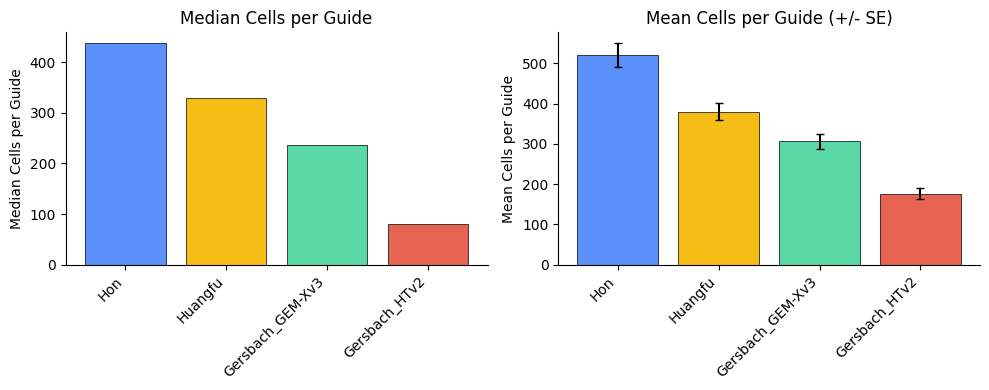

In [8]:
# Barplot of median cells per guide
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Median
ax = axes[0]
colors = [dataset_colors.get(ds, 'gray') for ds in guide_all['dataset']]
ax.bar(range(len(guide_all)), guide_all['cells_per_guide_median'], color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('Median Cells per Guide')
ax.set_title('Median Cells per Guide')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mean with std error bars
ax = axes[1]
ax.bar(range(len(guide_all)), guide_all['cells_per_guide_mean'], 
       yerr=guide_all['cells_per_guide_std'] / np.sqrt(guide_all['n_guides_total']),
       color=colors, edgecolor='black', linewidth=0.5, capsize=3)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('Mean Cells per Guide')
ax.set_title('Mean Cells per Guide (+/- SE)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "cells_per_guide_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Guides per Cell Comparison

In [9]:
# Guides per cell summary stats
gpc_cols = ['guides_per_cell_median', 'guides_per_cell_mean', 'guides_per_cell_std',
            'guides_per_cell_min', 'guides_per_cell_max']
gpc_summary = guide_all[['dataset'] + gpc_cols].copy()
gpc_summary

,dataset,guides_per_cell_median,guides_per_cell_mean,guides_per_cell_std,guides_per_cell_min,guides_per_cell_max
0,Hon_WTC11-benchmark_TF-Perturb-seq,1.0,2.356127,4.042959,0,108
5,Huangfu_WTC11-benchmark_TF-Perturb-seq,1.0,1.379934,1.076746,0,25
10,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,0.0,0.482047,0.839429,0,11
15,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,2.0,2.166863,1.731243,0,25


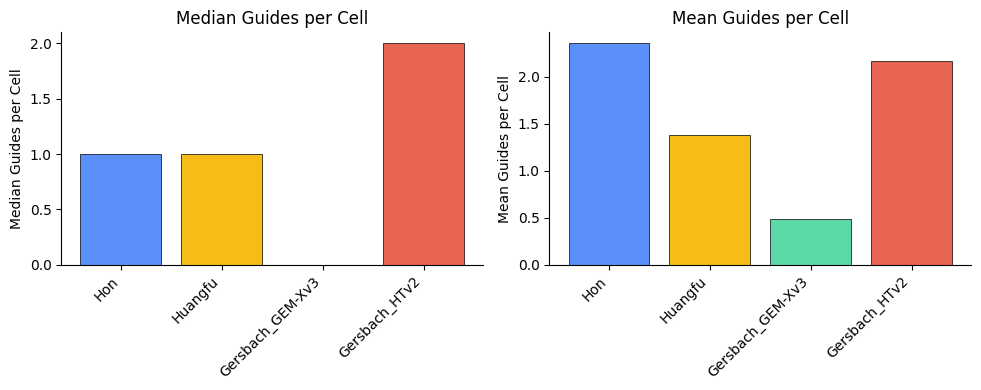

In [10]:
# Barplot of guides per cell
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Median
ax = axes[0]
colors = [dataset_colors.get(ds, 'gray') for ds in guide_all['dataset']]
ax.bar(range(len(guide_all)), guide_all['guides_per_cell_median'], color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('Median Guides per Cell')
ax.set_title('Median Guides per Cell')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mean
ax = axes[1]
ax.bar(range(len(guide_all)), guide_all['guides_per_cell_mean'], color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('Mean Guides per Cell')
ax.set_title('Mean Guides per Cell')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "guides_per_cell_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Guide UMI Comparison

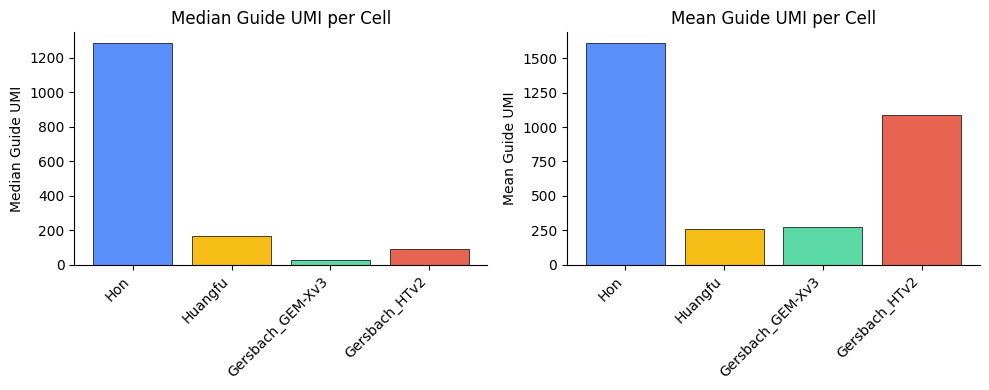

In [11]:
# Barplot of guide UMI stats
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Median
ax = axes[0]
colors = [dataset_colors.get(ds, 'gray') for ds in guide_all['dataset']]
ax.bar(range(len(guide_all)), guide_all['guide_umi_median'], color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('Median Guide UMI')
ax.set_title('Median Guide UMI per Cell')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mean
ax = axes[1]
ax.bar(range(len(guide_all)), guide_all['guide_umi_mean'], color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('Mean Guide UMI')
ax.set_title('Mean Guide UMI per Cell')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "guide_umi_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Guide Assignment Rates

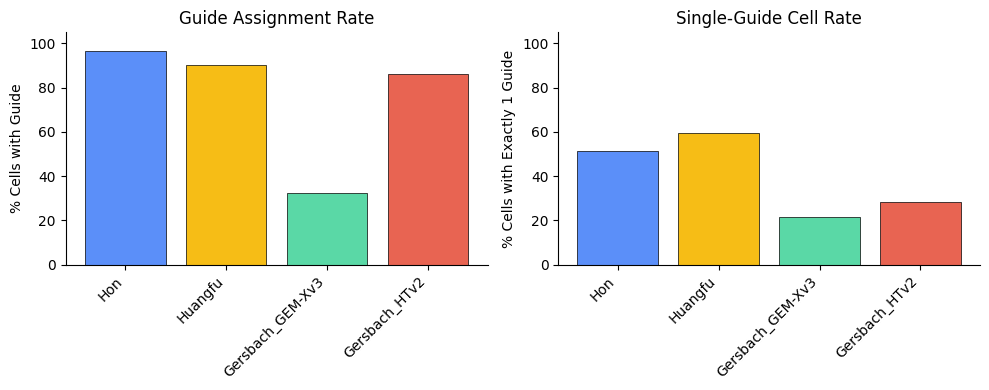

In [12]:
# Barplot of assignment rates
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Fraction of cells with guide
ax = axes[0]
colors = [dataset_colors.get(ds, 'gray') for ds in guide_all['dataset']]
ax.bar(range(len(guide_all)), guide_all['frac_cells_with_guide'] * 100, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('% Cells with Guide')
ax.set_title('Guide Assignment Rate')
ax.set_ylim(0, 105)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Cells with exactly 1 guide
ax = axes[1]
frac_single = guide_all['n_cells_exactly_1_guide'] / guide_all['n_cells'] * 100
ax.bar(range(len(guide_all)), frac_single, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(guide_all)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in guide_all['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('% Cells with Exactly 1 Guide')
ax.set_title('Single-Guide Cell Rate')
ax.set_ylim(0, 105)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "guide_assignment_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Summary Table

In [13]:
# Create summary table
summary_cols = [
    'dataset', 'n_cells', 'n_guides_total',
    'cells_per_guide_median', 'cells_per_guide_mean',
    'guides_per_cell_median', 'guides_per_cell_mean',
    'guide_umi_median', 'guide_umi_mean',
    'frac_cells_with_guide', 'n_cells_exactly_1_guide'
]
summary = guide_all[summary_cols].copy()
summary['pct_single_guide'] = summary['n_cells_exactly_1_guide'] / summary['n_cells'] * 100
summary

,dataset,n_cells,n_guides_total,cells_per_guide_median,cells_per_guide_mean,guides_per_cell_median,guides_per_cell_mean,guide_umi_median,guide_umi_mean,frac_cells_with_guide,n_cells_exactly_1_guide,pct_single_guide
0,Hon_WTC11-benchmark_TF-Perturb-seq,91866,416.0,437.0,520.307692,1.0,2.356127,1283.0,1607.593854,0.964535,47341,51.532667
5,Huangfu_WTC11-benchmark_TF-Perturb-seq,114470,416.0,330.0,379.713942,1.0,1.379934,165.0,257.330183,0.903730,67879,59.298506
10,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,264159,416.0,237.0,306.098558,0.0,0.482047,29.0,273.552709,0.324562,57196,21.652111
15,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,33938,416.0,80.0,176.776442,2.0,2.166863,89.0,1090.261506,0.861070,9643,28.413578


In [14]:
# Save summary
summary.to_csv(OUTPUT_DIR / "guide_capture_summary.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'guide_capture_summary.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/guide_capture_summary.tsv


---
# DONE!